In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [410]:
dataset = {
    'color' : ['Red', 'Blue', 'Red', 'Blue','Red', 'Blue','Blue','Red', 'Blue', 'Blue'],
    'target' : [1,0,1,0,1,0,0,1,0,1]
}

In [413]:
data = pd.DataFrame(dataset)

In [415]:
data

,color,target
0,Red,1
1,Blue,0
2,Red,1
3,Blue,0
4,Red,1
5,Blue,0
6,Blue,0
7,Red,1
8,Blue,0
9,Blue,1


In [417]:
ohe = OneHotEncoder(sparse_output=False)#sparse = False

In [419]:
ohe.fit_transform(data[['color']])

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [421]:
encoded_data = ohe.fit_transform(data[['color']])

In [423]:
encoded_data

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [425]:
ohe.get_feature_names_out()

array(['color_Blue', 'color_Red'], dtype=object)

In [427]:
tree = DecisionTreeClassifier(criterion='entropy',)

In [429]:
tree.fit(encoded_data, data['target'] )

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.75, 'color_Blue <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1'),
 Text(0.75, 0.25, 'entropy = 0.65\nsamples = 6\nvalue = [5, 1]\nclass = 0')]

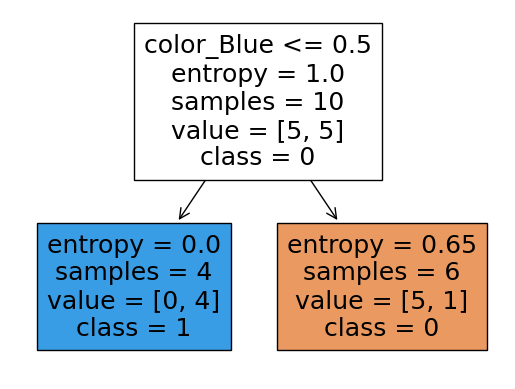

In [431]:
plot_tree(tree, feature_names = ohe.get_feature_names_out(),class_names = ['0','1'], filled = True)

In [376]:
dataset = {
    'color' : ['Red', 'green', 'Red', 'Blue','Red', 'green','Blue','Red', 'Blue', 'green'],
    'Size' : ['Small', 'Large', 'Medium','Small', 'Large', 'Medium','Small', 'Large', 'Medium','Large' ],
    'Weight':[1,2,4,1,3,2,4,5,3,2],
    'target' : [1,0,1,0,1,0,0,1,0,1]
}

In [378]:
data = pd.DataFrame(dataset)

In [380]:
ohe = OneHotEncoder(sparse_output=False) #sparse = False
encoded_data = ohe.fit_transform(data[['color','Size']])

In [382]:
encoded_data[:3]

array([[0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.]])

In [384]:
column_name = ohe.get_feature_names_out()

In [386]:
column_name

array(['color_Blue', 'color_Red', 'color_green', 'Size_Large',
       'Size_Medium', 'Size_Small'], dtype=object)

In [388]:
encoded_df = pd.DataFrame(encoded_data, columns=column_name)

In [390]:
final_data = pd.concat([encoded_df, data[['Weight','target']]], axis = 1)

In [392]:
final_data

,color_Blue,color_Red,color_green,Size_Large,Size_Medium,Size_Small,Weight,target
0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
1,0.0,0.0,1.0,1.0,0.0,0.0,2,0
2,0.0,1.0,0.0,0.0,1.0,0.0,4,1
3,1.0,0.0,0.0,0.0,0.0,1.0,1,0
4,0.0,1.0,0.0,1.0,0.0,0.0,3,1
5,0.0,0.0,1.0,0.0,1.0,0.0,2,0
6,1.0,0.0,0.0,0.0,0.0,1.0,4,0
7,0.0,1.0,0.0,1.0,0.0,0.0,5,1
8,1.0,0.0,0.0,0.0,1.0,0.0,3,0
9,0.0,0.0,1.0,1.0,0.0,0.0,2,1


In [394]:
X = final_data.drop(columns = 'target')

In [396]:
y = final_data['target']

In [398]:
tree = DecisionTreeClassifier()

In [400]:
tree.fit(X,y)

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'color_Red <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(0.4, 0.5, 'Size_Large <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = 0'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(0.6, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1')]

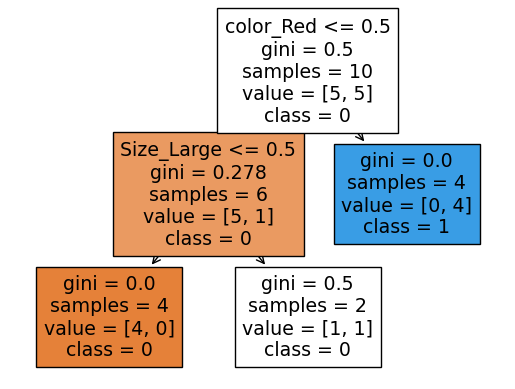

In [402]:
plot_tree(tree, feature_names = X.columns.values,class_names = ['0','1'], filled = True)

In [404]:
tree.feature_importances_

array([0.        , 0.83333333, 0.        , 0.16666667, 0.        ,
       0.        , 0.        ])

In [406]:
tree.feature_names_in_

array(['color_Blue', 'color_Red', 'color_green', 'Size_Large',
       'Size_Medium', 'Size_Small', 'Weight'], dtype=object)

<Axes: >

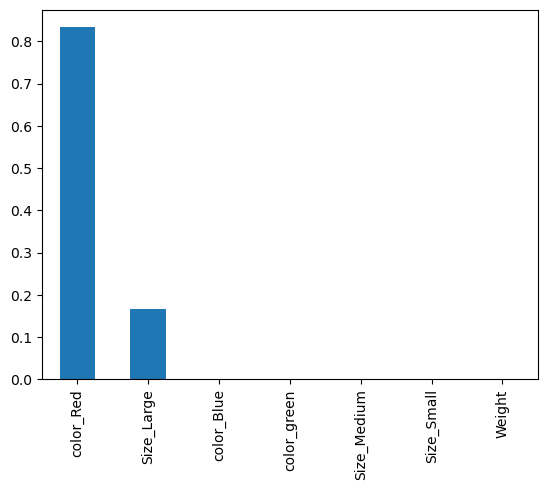

In [408]:
pd.Series(tree.feature_importances_, index=tree.feature_names_in_).sort_values(ascending=False).plot(kind = 'bar')

In [239]:
dataset = {
    'Weight':[1,2,4,1,3,2,4,5,3,2],
    'target' : [1,0,1,0,1,0,0,1,0,1]
}

data = pd.DataFrame(dataset)

In [241]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [243]:
tree.fit(data[['Weight']], data['target'])

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

[Text(0.6666666666666666, 0.875, 'Weight <= 4.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(0.5, 0.625, 'Weight <= 2.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]\nclass = 0'),
 Text(0.3333333333333333, 0.375, 'Weight <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = 0'),
 Text(0.16666666666666666, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.5, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.6666666666666666, 0.375, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = 0'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1')]

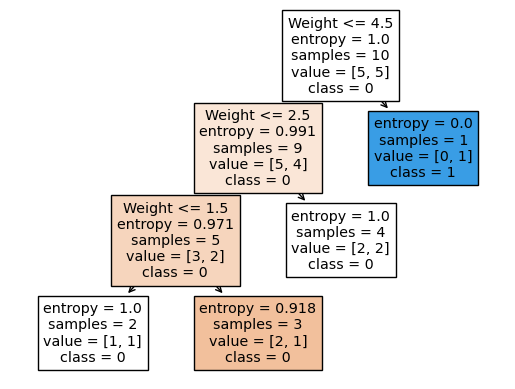

In [245]:
plot_tree(tree, feature_names = ['Weight'],class_names = ['0','1'], filled = True)

In [248]:
iris = load_iris()

# Convert to a pandas DataFrame for easier manipulation and viewing
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column
iris_df['target'] = iris.target

In [250]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [252]:
X = iris_df.drop(columns='target')

In [254]:
y = iris_df['target']

In [256]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=3)

In [258]:
train_X.shape, test_X.shape

((100, 4), (50, 4))

# criterion

In [261]:
def fit_result( param):
    tree = DecisionTreeClassifier(criterion = param)
    tree.fit(train_X, train_y)
    train_pred = tree.predict(train_X)
    test_pred = tree.predict(test_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred), "Test Accuracy : ",accuracy_score(test_y, test_pred))

In [263]:
fit_result( param = 'entropy')

Train Accuracy :  1.0 Test Accuracy :  0.92


In [265]:
fit_result( 'gini')

Train Accuracy :  1.0 Test Accuracy :  0.92


### Summary: try and check the result for both criterian. Some will be better in some dataset, choose wisely. but the result performance will not be a drastical difference

# max_depth

In [269]:
def fit_result( param):
    tree = DecisionTreeClassifier(max_depth = param)
    tree.fit(train_X, train_y)
    train_pred = tree.predict(train_X)
    test_pred = tree.predict(test_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred), "Test Accuracy : ",accuracy_score(test_y, test_pred))

In [271]:
fit_result( param = None)

Train Accuracy :  1.0 Test Accuracy :  0.92


In [273]:
fit_result( param = 1)

Train Accuracy :  0.67 Test Accuracy :  0.66


In [275]:
fit_result( param = 2)

Train Accuracy :  0.97 Test Accuracy :  0.92


In [277]:
fit_result( param = 3)

Train Accuracy :  0.98 Test Accuracy :  0.94


In [279]:
fit_result( param = 4)

Train Accuracy :  1.0 Test Accuracy :  0.92


In [281]:
fit_result( param = 5)

Train Accuracy :  1.0 Test Accuracy :  0.94


In [283]:
fit_result( param = 6)

Train Accuracy :  1.0 Test Accuracy :  0.96


In [285]:
fit_result( param = 7)

Train Accuracy :  1.0 Test Accuracy :  0.94


In [287]:
fit_result( param = 20)

Train Accuracy :  1.0 Test Accuracy :  0.96


### Summary: Start with no depth limit (None) and check the performance. If overfitting is observed, gradully reduce the depth

# min_samples_split

In [291]:
train_X.shape

(100, 4)

In [293]:
def fit_result( param):
    tree = DecisionTreeClassifier(min_samples_split = param)
    tree.fit(train_X, train_y)
    train_pred = tree.predict(train_X)
    test_pred = tree.predict(test_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred), "Test Accuracy : ",accuracy_score(test_y, test_pred))
    return tree

In [295]:
fit_result( param = 2)

Train Accuracy :  1.0 Test Accuracy :  0.92


DecisionTreeClassifier()

In [297]:
fit_result( param = 3)

Train Accuracy :  1.0 Test Accuracy :  0.96


DecisionTreeClassifier(min_samples_split=3)

In [299]:
fit_result( param = 4)

Train Accuracy :  0.98 Test Accuracy :  0.94


DecisionTreeClassifier(min_samples_split=4)

In [301]:
fit_result( param = 5)

Train Accuracy :  0.98 Test Accuracy :  0.94


DecisionTreeClassifier(min_samples_split=5)

In [303]:
fit_result( param = 6)

Train Accuracy :  0.98 Test Accuracy :  0.94


DecisionTreeClassifier(min_samples_split=6)

In [305]:
fit_result( param = 7)

Train Accuracy :  0.98 Test Accuracy :  0.94


DecisionTreeClassifier(min_samples_split=7)

In [307]:
fit_result( param = 9)

Train Accuracy :  0.98 Test Accuracy :  0.94


DecisionTreeClassifier(min_samples_split=9)

In [309]:
fit_result( param = 10)

Train Accuracy :  0.98 Test Accuracy :  0.94


DecisionTreeClassifier(min_samples_split=10)

In [311]:
fit_result( param = 20)

Train Accuracy :  0.98 Test Accuracy :  0.94


DecisionTreeClassifier(min_samples_split=20)

In [313]:
tree = fit_result( param = 1000)

Train Accuracy :  0.35 Test Accuracy :  0.3


In [315]:
train_y.values

array([0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1,
       0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 1, 2,
       2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0,
       1, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1,
       0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 2])

[Text(0.5, 0.5, 'gini = 0.666\nsamples = 100\nvalue = [32, 33, 35]\nclass = 2')]

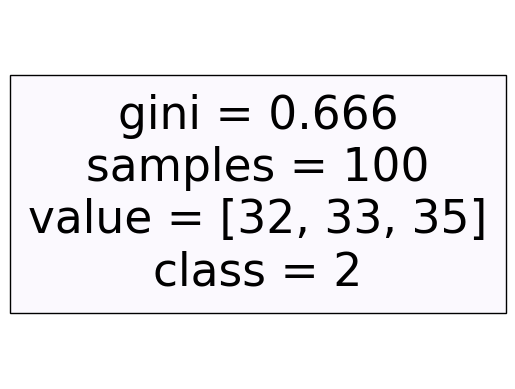

In [317]:
plot_tree(tree, feature_names = train_X.columns.values ,class_names = ['0','1','2'], filled = True)

### Summary: default is 2, which mean a node will split as long as it has more than 2 samples. start with a small value and increase if the tree in overfitting. 
### Applicable only on decision node

In [320]:
def fit_result( param):
    tree = DecisionTreeClassifier(min_samples_leaf = param)
    tree.fit(train_X, train_y)
    train_pred = tree.predict(train_X)
    test_pred = tree.predict(test_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred), "Test Accuracy : ",accuracy_score(test_y, test_pred))
    return tree

In [322]:
tree = fit_result(param = 10)

Train Accuracy :  0.97 Test Accuracy :  0.92


[Text(0.375, 0.875, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [32, 33, 35]\nclass = 2'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = 0'),
 Text(0.5, 0.625, 'petal length (cm) <= 4.85\ngini = 0.5\nsamples = 68\nvalue = [0, 33, 35]\nclass = 2'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.45\ngini = 0.111\nsamples = 34\nvalue = [0, 32, 2]\nclass = 1'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [0, 21, 0]\nclass = 1'),
 Text(0.375, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [0, 11, 2]\nclass = 1'),
 Text(0.75, 0.375, 'petal length (cm) <= 5.15\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]\nclass = 2'),
 Text(0.625, 0.125, 'gini = 0.18\nsamples = 10\nvalue = [0, 1, 9]\nclass = 2'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24]\nclass = 2')]

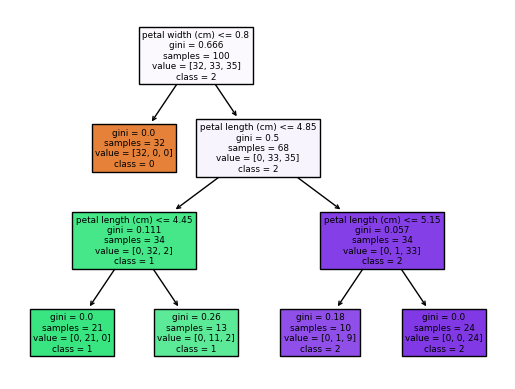

In [324]:
plot_tree(tree, feature_names = train_X.columns.values ,class_names = ['0','1','2'], filled = True)

In [325]:
fit_result(param = 13)


Train Accuracy :  0.97 Test Accuracy :  0.92


DecisionTreeClassifier(min_samples_leaf=13)

### Summary:
Too low: chance of overfitting
Too high: underfit

In [329]:
# 

In [331]:
def fit_result( param):
    tree = DecisionTreeClassifier(max_features = param)
    tree.fit(train_X, train_y)
    train_pred = tree.predict(train_X)
    test_pred = tree.predict(test_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred), "Test Accuracy : ",accuracy_score(test_y, test_pred))
    return tree

In [333]:
tree = fit_result(None)

Train Accuracy :  1.0 Test Accuracy :  0.96


[Text(0.4, 0.9, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [32, 33, 35]\nclass = 2'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = 0'),
 Text(0.5, 0.7, 'petal length (cm) <= 4.85\ngini = 0.5\nsamples = 68\nvalue = [0, 33, 35]\nclass = 2'),
 Text(0.2, 0.5, 'petal width (cm) <= 1.65\ngini = 0.111\nsamples = 34\nvalue = [0, 32, 2]\nclass = 1'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]\nclass = 1'),
 Text(0.3, 0.3, 'sepal width (cm) <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = 2'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = 2'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 1'),
 Text(0.8, 0.5, 'petal width (cm) <= 1.55\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]\nclass = 2'),
 Text(0.7, 0.3, 'petal length (cm) <= 4.95\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = 2'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 1'),
 Tex

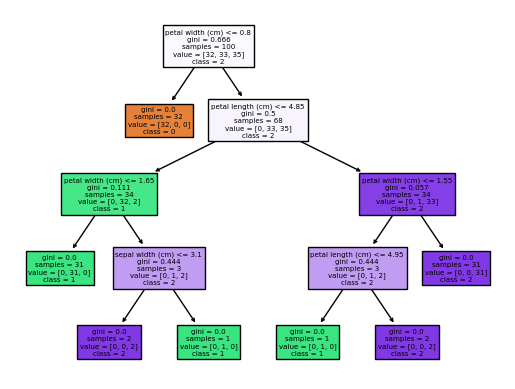

In [335]:
plot_tree(tree, feature_names = train_X.columns.values ,class_names = ['0','1','2'], filled = True)

In [336]:
tree = fit_result('sqrt')

Train Accuracy :  1.0 Test Accuracy :  0.94


[Text(0.5357142857142857, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [32, 33, 35]\nclass = 2'),
 Text(0.4642857142857143, 0.75, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = 0'),
 Text(0.6071428571428571, 0.75, 'sepal length (cm) <= 6.25\ngini = 0.5\nsamples = 68\nvalue = [0, 33, 35]\nclass = 2'),
 Text(0.35714285714285715, 0.5833333333333334, 'petal length (cm) <= 4.75\ngini = 0.36\nsamples = 34\nvalue = [0, 26, 8]\nclass = 1'),
 Text(0.21428571428571427, 0.4166666666666667, 'sepal width (cm) <= 2.55\ngini = 0.074\nsamples = 26\nvalue = [0, 25, 1]\nclass = 1'),
 Text(0.14285714285714285, 0.25, 'petal width (cm) <= 1.4\ngini = 0.219\nsamples = 8\nvalue = [0, 7, 1]\nclass = 1'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]\nclass = 1'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = 2'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsampl

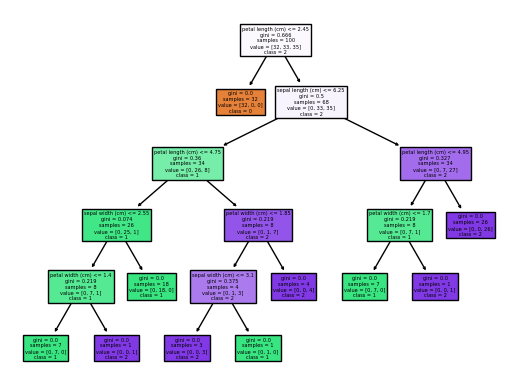

In [339]:
plot_tree(tree, feature_names = train_X.columns.values ,class_names = ['0','1','2'], filled = True)

In [340]:
#Too high: overfitting
#Too low; underfitting

In [343]:
param_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth': [2,3,5,10,None],
    'min_samples_split': range(0,20),
    'min_samples_leaf': [1,2,3,4,5],
    'max_features': ['auto','sqrt', 'log2']    
    
}


In [345]:
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [347]:
import warnings
warnings.filterwarnings('ignore')

In [349]:
grid_search = GridSearchCV(tree, param_grid=param_grid,scoring = 'accuracy', verbose = 2 )

In [351]:
%%time
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1; total time=   0.0

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': range(0, 20)},
             scoring='accuracy', verbose=2)

In [352]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [355]:
train_pred = grid_search.best_estimator_.predict(train_X)
test_pred = grid_search.best_estimator_.predict(test_X)

In [357]:
accuracy_score(train_y, train_pred), accuracy_score(test_y, test_pred)

(0.98, 0.94)

In [359]:

randomized_search = RandomizedSearchCV(tree, cv = 2, param_distributions=param_grid,scoring = 'accuracy', random_state= 32 )

In [361]:
%%time
randomized_search.fit(train_X, train_y)

CPU times: total: 62.5 ms
Wall time: 98 ms


RandomizedSearchCV(cv=2, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': range(0, 20)},
                   random_state=32, scoring='accuracy')

In [363]:
randomized_search.best_estimator_

DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=14)

In [365]:
randomized_search.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'gini'}

In [367]:
train_pred = randomized_search.best_estimator_.predict(train_X)
test_pred = randomized_search.best_estimator_.predict(test_X)

In [369]:
accuracy_score(train_y, train_pred), accuracy_score(test_y, test_pred)

(0.97, 0.92)